In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.datasets import load_digits
import sklearn.metrics as met

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#load data as Pandas DataFrame
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')

**Data Cleaning: looking for nulls**

In [ ]:
dataset.isnull().sum()
#no null values found

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Exploratory Data Analysis/Data Wrangling**

In [ ]:
#looking at the first few rows and columns to get a sense of the data
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#Get a general idea of the overall statistics of the data
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
#Finding covariances
dataset.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.712114,-0.001931,0.029533,0.381022,0.000426,-0.708919,3.266013,0.000670,-0.054265,-0.001651,-0.125533,-0.084947
volatile acidity,-0.001931,0.010160,-0.001823,0.032865,0.000155,-0.166300,0.382354,0.000008,-0.000486,-0.000411,0.008400,-0.017382
citric acid,0.029533,-0.001823,0.014646,0.057829,0.000302,0.193630,0.622989,0.000054,-0.002992,0.000861,-0.011278,-0.000987
residual sugar,0.381022,0.032865,0.057829,25.725770,0.009828,25.800578,86.531303,0.012727,-0.148684,-0.015435,-2.812740,-0.438316
chlorides,0.000426,0.000155,0.000302,0.009828,0.000477,0.037674,0.184687,0.000017,-0.000298,0.000042,-0.009684,-0.004062
free sulfur dioxide,-0.708919,-0.166300,0.193630,25.800578,0.037674,289.242720,444.865891,0.014966,-0.001587,0.114938,-5.234509,0.122878
total sulfur dioxide,3.266013,0.382354,0.622989,86.531303,0.184687,444.865891,1806.085491,0.067352,0.014894,0.652645,-23.476605,-6.576746
density,0.000670,0.000008,0.000054,0.012727,0.000017,0.014966,0.067352,0.000009,-0.000042,0.000025,-0.002871,-0.000814
pH,-0.054265,-0.000486,-0.002992,-0.148684,-0.000298,-0.001587,0.014894,-0.000042,0.022801,0.002688,0.022565,0.013297
sulphates,-0.001651,-0.000411,0.000861,-0.015435,0.000042,0.114938,0.652645,0.000025,0.002688,0.013025,-0.002448,0.005425


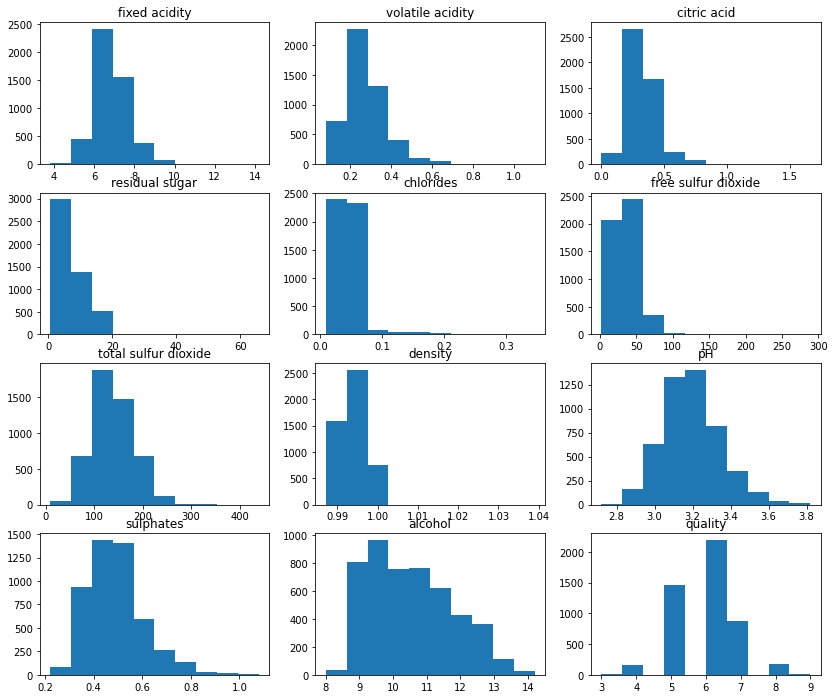

In [ ]:
#Plotting histograms to see data distributions
cols = dataset.columns
fig = plt.gcf()
fig.set_size_inches(14, 12)
for i in range(len(cols)):
  plt.subplot(4,3,i+1).hist(dataset[cols[i]])
  plt.title(cols[i])

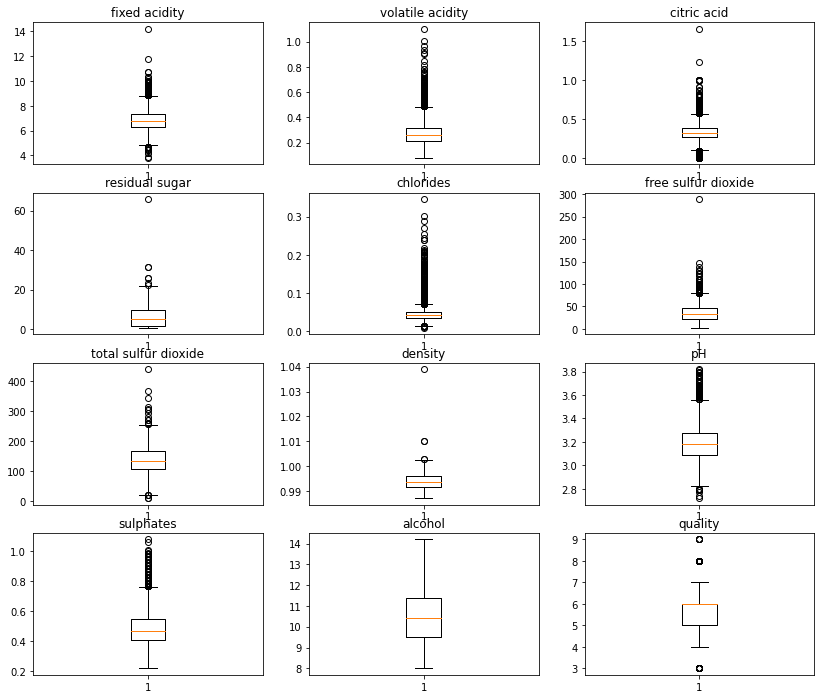

In [ ]:
#Looking for potential outliers
#ols = dataset.columns
fig = plt.gcf()
fig.set_size_inches(14, 12)
for i in range(len(cols)):
  plt.subplot(4,3,i+1).boxplot(dataset[cols[i]])
  plt.title(cols[i])

**Feature Engineering:**

-Data from fixed acidity, citric acid, free sulfur dioxide, residual sugar, and 
density has outliers that can potentially skew the results. We will reset the outliers (max value) to the mean of that column 

-Judging from the covariance matrix free sulfur dioxide has the same covariance trend as total sulfur dioxide but just on a smaller scale. We will combine the two features into one and call it overall sulfur dioxide.


In [ ]:
#Reset outlier (max value) to mean of fixed acidity
col_index = dataset.columns.get_loc("fixed acidity")
max_rowindex = dataset['fixed acidity'].idxmax()
dataset.iat[max_rowindex,col_index] =  dataset['fixed acidity'].mean()

#Reset outlier (max value) to mean of citric acid
col_index = dataset.columns.get_loc("citric acid")
max_rowindex = dataset['citric acid'].idxmax()
dataset.iat[max_rowindex,col_index] =  dataset['citric acid'].mean()

#Reset outlier (max value) to mean of free sulfur dioxide
col_index = dataset.columns.get_loc("free sulfur dioxide")
max_rowindex = dataset['free sulfur dioxide'].idxmax()
dataset.iat[max_rowindex,col_index] =  dataset['free sulfur dioxide'].mean()

#Reset outlier (max value) to mean of residual sugar
col_index = dataset.columns.get_loc("residual sugar")
max_rowindex = dataset['residual sugar'].idxmax()
dataset.iat[max_rowindex,col_index] =  dataset['residual sugar'].mean()

#Reset outlier (max value) to mean of density
col_index = dataset.columns.get_loc("density")
max_rowindex = dataset['density'].idxmax()
dataset.iat[max_rowindex,col_index] =  dataset['density'].mean()

In [ ]:
dataset['overall sulfur dioxide'] = dataset['free sulfur dioxide'] + dataset['total sulfur dioxide']
dataset = dataset.drop(['overall sulfur dioxide', 'free sulfur dioxide'], axis=1)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#Split data into test and train groups. Test size set to 20% of data
X = dataset.loc[:, dataset.columns != 'quality']
y = dataset['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2 ,random_state=42)

**Run different models: OLS Regression, Random Forest, Boosted**

In [ ]:
#Cross Validation using log reg, with multi_class ovr, and 1000 max iterations

lr = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr', max_iter = 1000)
cv_scores = cross_val_score(lr, X_train, y_train, cv = 5)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy scores for the five folds: ', cv_scores)
print('Mean cross-validation score: {:.3f}'.format(np.mean(cv_scores)))
print('Accuracy score: ', met.accuracy_score(y_pred,y_test))
print('Prescision score: ', met.precision_score(y_pred,y_test, average = 'macro'))
print('Recall score: ', met.recall_score(y_pred,y_test,average = 'macro',zero_division = 0))

Accuracy scores for the five folds:  [0.53826531 0.51658163 0.54336735 0.54533844 0.52873563]
Mean cross-validation score: 0.534
Accuracy score:  0.5163265306122449
Prescision score:  0.2297125572737686
Recall score:  0.2720262111742257


In [ ]:
#Cross validation with Random Forest

rf_clf = RandomForestClassifier(n_estimators=200)
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv = 5)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('Accuracy scores for the 5 folds: ', rf_cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(rf_cv_scores)))
print('Accuracy score: ', met.accuracy_score(y_pred,y_test))
print('Prescision score: ', met.precision_score(y_pred,y_test, average='macro'))
print('Recall score: ', met.recall_score(y_pred,y_test,average = 'macro', zero_division = 0))

Accuracy scores for the 5 folds:  [0.6505102  0.66581633 0.65816327 0.64878672 0.64367816]
Mean cross validation score: 0.653
Accuracy score:  0.7020408163265306
Prescision score:  0.46691574505900113
Recall score:  0.6314959909074264


**Hyperparameter tuning: n_estimators were varied from 50-250 with 200 being the optimal number.**

In [ ]:
#implementing Gradient boost classifier
#X_train_new = X_train[]
params = {'n_estimators': 700,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy score: ', met.accuracy_score(y_pred,y_test))
print('Prescision score: ', met.precision_score(y_pred,y_test,average = 'macro'))
print('Recall score: ', met.recall_score(y_pred,y_test,average = 'macro',zero_division = 0))

Accuracy score:  0.6663265306122449
Prescision score:  0.45248933503336425
Recall score:  0.5223935355448383


**Hyperparameter tuning: n_estimators were varied from 300-700 by increments of 100. max_depth was varied from 2-7 by increments of 1. Optimal parameters were 700 and 4 for n_estimators and max_depth respetively.**

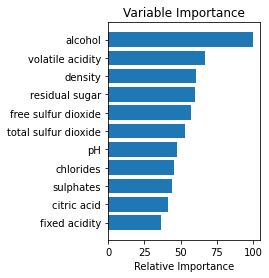

In [ ]:
# Make importances relative to max importance.
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**Conclusion**

3 models were compared: Logistic Regression (One vs Rest), Random Forest, and Gradient Boost. These models were ran multiple times with various engineered data and tried with removal of lowest 5 important features. The result seen on this notebook  were the best found performing feature set and parameters (within the time given).

The models yield the following accuracy, precision, and recall metrics:

**Logistric Regresion (OVR)**

Accuracy score:  0.5163265306122449

Prescision score:  0.2297125572737686

Recall score:  0.2720262111742257

**Random Forest**

Accuracy score:  0.7020408163265306

Prescision score:  0.46691574505900113

Recall score:  0.6314959909074264

**Gradient Boost**

Accuracy score:  0.6663265306122449

Prescision score:  0.45248933503336425

Recall score:  0.5223935355448383

Based on these metrics, **Random Forest will be the final model chosen** since it excelled in all of these performance metrics. Additionally, runtime (which was no clocked) but was noticeably faster that the rest for the this data set. 